# Problem:1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
#Import the liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv(r"C:\Users\admin\Documents\Data Science\Assignment\Simple Linear Regression\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA On Data

In [3]:
#Rename column:
df.rename(columns={'Delivery Time':'Delivery_Time'}, inplace=True)

In [4]:
#Rename column:
df.rename(columns={'Sorting Time':'Sorting_Time'}, inplace=True)

In [5]:
# Check for null value 
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [6]:
#Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
#Checking for Duplicate Values
df.duplicated().sum()

0

# Plotting the data to check for outliers

<AxesSubplot:xlabel='Sorting_Time'>

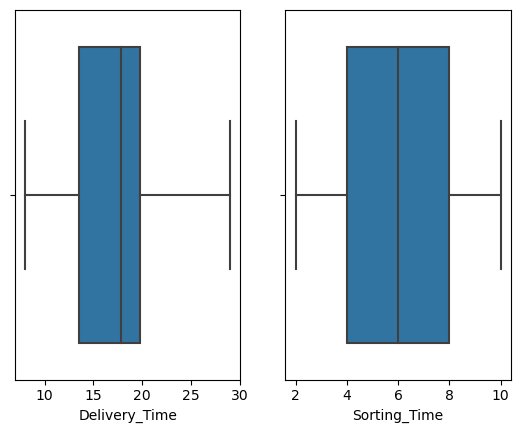

In [9]:
#Plotting the data to check for outliers
plt.subplot(1,2,1)
sns.boxplot(df['Delivery_Time'])

plt.subplot(1,2,2)
sns.boxplot(df['Sorting_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

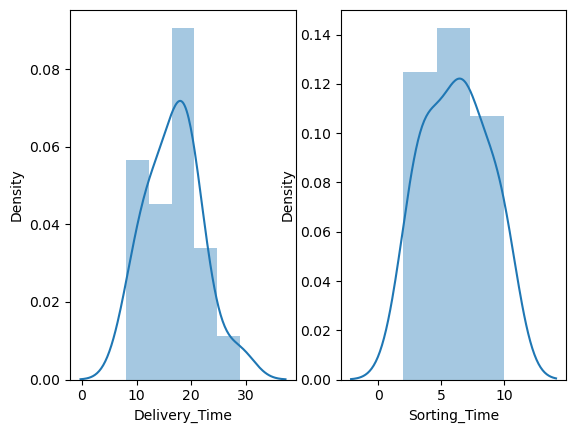

In [10]:
#check for a distrubution
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

# As you can see there are no Outliers in the data

In [11]:
#Checking the Correlation between variables
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

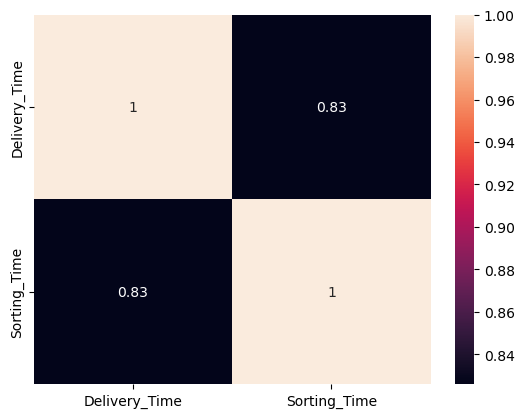

In [12]:
#plot a heatmap:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

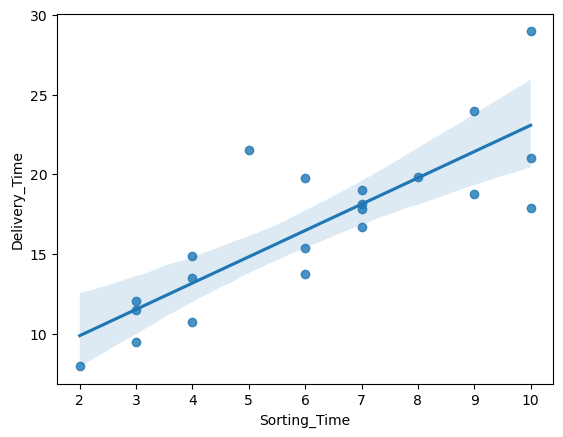

In [13]:
#regplot = regression plot
sns.regplot(x=df['Sorting_Time'], y=df['Delivery_Time'])

# As you can see above

There is good correlation between the two variable.          
The score is more than 0.8 which is good sign.

In [14]:
df.skew()

Delivery_Time    0.352390
Sorting_Time     0.047115
dtype: float64

In [15]:
#Create a model

In [16]:
#import liabrary for regression:
import statsmodels.formula.api as smf 

In [17]:
#create a model without transformation
model=smf.ols('Delivery_Time~Sorting_Time', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        14:27:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per interpretation of above summary:

R squared and Adj. R squared value is still below 0.85.         
It is thumb rule to consider the adj rsquared to be atleast 0.8 for good model for prediction.          
lets try some transformation to check whether these score can get higher than this. 

In [18]:
#create a model with sqrt transformation
model1=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 28 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                            14:27:46   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per interpretation of above summary:

After squareroot transformation on data, R Squared and Adj R-squared value is increased but it is still below the 0.8 as per thumb rule.           
so let try other data transformation to check whether score incresed or not.

In [19]:
#create a model with cube root transformation
model2=smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Tue, 28 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                            14:27:48   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As per interpretation of above summary:

After squareroot transformation on data, R Squared and Adj R-squared value is increased but it is still below the 0.8 as per thumb rule.           
so let try other data transformation to check whether score incresed or not.

In [20]:
#create a model with log transformation
model3=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           14:27:51   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model

After log transformation on the Data, This Model has been scored the highest R-squared and Adjusted R-squared scores than the previous model
Yet both Adjusted R-squared and R-squared scores are still below 0.8 which is a thumb rule we consider for a good model for prediction.
Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

# Model Validation

Comparing all models with respect to their root mean squared error

In [21]:
#Predict the output(Delivery_time) for each transformation
model1_predict_y=np.square(model1.predict(df['Sorting_Time']))
model2_predict_y=pow(model2.predict(df['Sorting_Time']),3)
model3_predict_y=np.exp(model3.predict(df['Sorting_Time']))

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
#Calculate the RMSE for each transformation
model_rmse=np.sqrt(model.mse_resid)
model1_rmse=np.sqrt(mean_squared_error(df['Delivery_Time'],model1_predict_y))
model2_rmse=np.sqrt(mean_squared_error(df['Delivery_Time'],model2_predict_y))
model3_rmse=np.sqrt(mean_squared_error(df['Delivery_Time'],model3_predict_y))
print('model=',model_rmse,'\n','model1=',model1_rmse,'\n','model2=', model2_rmse,'\n','model3=',model3_rmse)

model= 2.9349037688901394 
 model1= 2.762294279320867 
 model2= 2.755584309893575 
 model3= 2.7458288976145497


In [31]:
#Check for the best model for prediction:
data={'model':model_rmse,'model1':model1_rmse,'model2':model2_rmse,'model3':model3_rmse}
min(data, key=data.get)

'model3'

# As model3 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

Model3 is the model where we did log transformation on both dependent variable as well as on independent variable

In [36]:
#Prediction as per model3:
Predicted_Delivery_Time_model3=np.exp(model3.predict(df['Sorting_Time']))
Predicted_Delivery_Time_model3

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [40]:
df.drop(columns=['Predicted_Delivery_Time'],inplace=True)

In [41]:
df['Predicted_Delivery_Time_model3']=Predicted_Delivery_Time_model3
df

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time_model3
0,21.00,10,22.597360
1,13.50,4,13.070123
2,19.75,6,16.653216
3,24.00,9,21.218593
4,29.00,10,22.597360
5,15.35,6,16.653216
6,19.00,7,18.259981
7,9.50,3,11.005911
8,17.90,10,22.597360
9,18.75,9,21.218593
